In [217]:
# Задание 1

In [218]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [219]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [220]:
boston = load_boston()

In [224]:
data, feature_names, target = boston['data'], boston['feature_names'], boston['target']

In [225]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [226]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [228]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [229]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

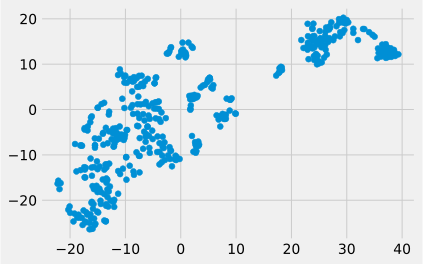

In [230]:
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [231]:
# Задание 2

In [232]:
from sklearn.cluster import KMeans

In [233]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

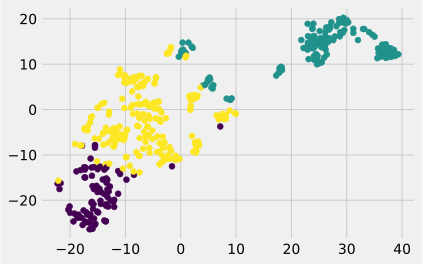

In [234]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [235]:
print('price mean:')
print(f'Cluster 1: {y_train["price"][labels_train == 0].mean()}')
print(f'Cluster 2: {y_train["price"][labels_train == 1].mean()}')
print(f'Cluster 3: {y_train["price"][labels_train == 2].mean()}')

price mean:
Cluster 1: 27.788372093023252
Cluster 2: 16.165354330708666
Cluster 3: 24.958115183246072


In [236]:
print('CRIM mean:')
print(f'Cluster 1: {X_train["CRIM"][labels_train == 0].mean()}')
print(f'Cluster 2: {X_train["CRIM"][labels_train == 1].mean()}')
print(f'Cluster 3: {X_train["CRIM"][labels_train == 2].mean()}')

CRIM mean:
Cluster 1: 0.07356558139534886
Cluster 2: 10.797028425196853
Cluster 3: 0.42166020942408367


In [237]:
# Задание 3*

In [238]:
labels_test = model.predict(X_test_scaled)

In [239]:
print('price mean:')
print(f'Cluster 1: {y_test["price"][labels_test == 0].mean()}')
print(f'Cluster 2: {y_test["price"][labels_test == 1].mean()}')
print(f'Cluster 3: {y_test["price"][labels_test == 2].mean()}')

price mean:
Cluster 1: 31.35
Cluster 2: 16.437142857142856
Cluster 3: 21.860784313725492


In [240]:
print('CRIM mean:')
print(f'Cluster 1: {X_test["CRIM"][labels_test == 0].mean()}')
print(f'Cluster 2: {X_test["CRIM"][labels_test == 1].mean()}')
print(f'Cluster 3: {X_test["CRIM"][labels_test == 2].mean()}')

CRIM mean:
Cluster 1: 0.062060000000000004
Cluster 2: 10.165531142857143
Cluster 3: 0.26607882352941176
